In [18]:
%matplotlib inline
#imports
from math import sin, pi
from matplotlib import pyplot as plt

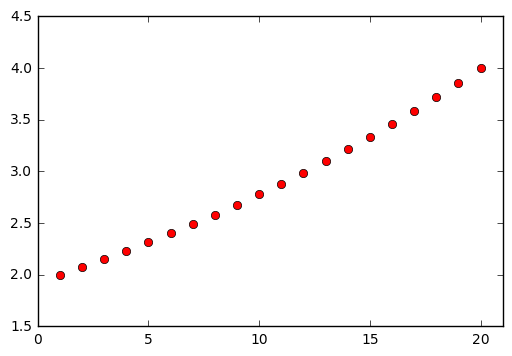

In [19]:
# given start duration, end duration, number of beats, generates a smooth curve

def smooth_curve(dur1,dur2,bts):
    x=(dur2/dur1)**(1/(bts-1))
    set=[dur1*(x**i) for i in range(bts)]
    return set

a=smooth_curve(2,4,20)
plt.xlim(0,21)
plt.ylim(1.5,4.5)
plt.plot([i+1 for i in range(len(a))],a,'ro')



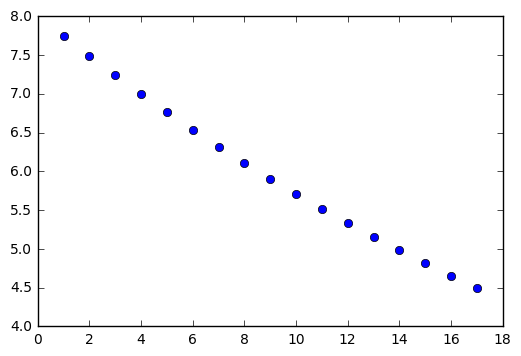

In [20]:
# given start dur, end dur, and total duration, generates smooth curve with as close as possible approximation of desired total duration

def smooth_curve_approximate_durtot(dur1,dur2,durtot):
    duravg=(dur1+dur2)/2
    btguess=round(durtot/duravg)
    btrange=[i for i in range(round(btguess/2),round(btguess*2))]
    q=sorted([[abs(durtot-sum(smooth_curve(dur1,dur2,i))),smooth_curve(dur1,dur2,i)] for i in btrange])
    return q[0][1]

b=smooth_curve_approximate_durtot(7.75,4.5,100)
plt.xlim(0,len(b) + 1)
plt.ylim(4,8)
plt.plot([i+1 for i in range(len(b))],b,'bo')

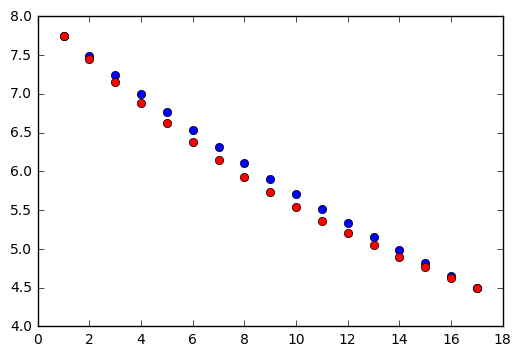

In [21]:
# given array and exact total duration, fudges  array to fit it to exact desired time
# fudging uses cosine function to shift items toward the middle of the array more than on the ends, so start dur and end dur aren't effected
def shifter(array,idealdur):
    stepsize=(pi/(len(array)-1))
    shift=idealdur-sum(array)
    set=[array[i]*sin(i*stepsize) for i in range(len(array))]
    newset=[(shift/sum(set))*i for i in set]
    finset=[array[i] + newset[i] for i in range(len(array))]
    return finset

# shift previous example from durtot 101.79 to 100
b=smooth_curve_approximate_durtot(7.75,4.5,100)
c=shifter(b,100)
plt.xlim(0,len(b) + 1)
plt.ylim(4,8)
plt.plot([i+1 for i in range(len(b))],b,'bo')
plt.plot([i+1 for i in range(len(c))],c,'ro')


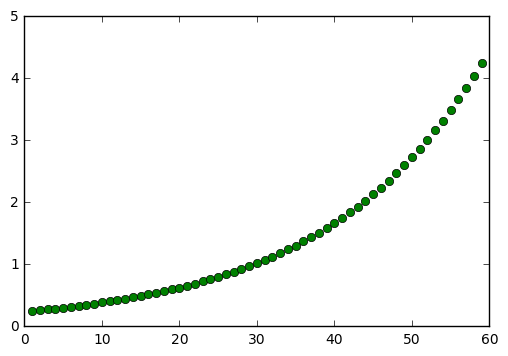

In [22]:
# given start dur, end dur, and total time, generates maximally smooth curve that exactly fits desired total duration
def smooth_curve_exact_durtot(dur1,dur2,durtot):
    set=smooth_curve_approximate_durtot(dur1,dur2,durtot)
    nset=shifter(set,durtot)
    return nset

e=smooth_curve_exact_durtot(0.25,4.25,83.771)
plt.xlim(0,len(e) + 1)
plt.ylim(0,5)
plt.plot([i+1 for i in range(len(e))],e,'go')



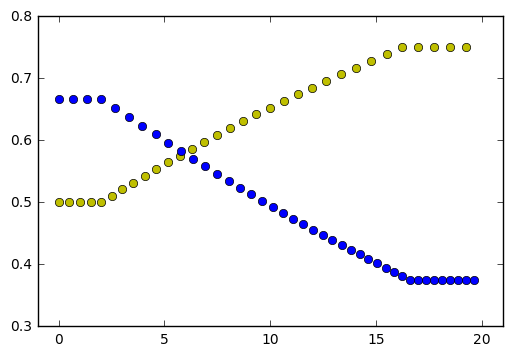

In [26]:
# here it is: the whole shebang
# given start dur, end dur, total beats, and total duration, generates maximally smooth curve over 
# given number of beats that exactly fits desired duration
# this one can be a bit wonky if the given parameters don't make sense

def smooth_curve_beats_exact_durtot(dur1,dur2,bts,durtot):
    set=smooth_curve(dur1,dur2,bts)
    nset=shifter(set,durtot)
    return nset

# two curves. One that starts at 120 bpm (0.5 s), stays steady for 2 s and goes to 80 bpm (.75 s) over 24 beats, stays steady for 3 s
#             One that starts at 90 bpm (2/3 s), stays steady for 2 s and goes to 160 bpm (.375 s) over 30 beats, stays steady for 3 s
# all happening in 2+15+3 s; starting/ending in phase

a=smooth_curve_beats_exact_durtot(0.5,0.75,24,15)
a=[.5 for i in range(4)]+a+[.75 for i in range(4)]
asum=[sum(a[:i])for i in range(len(a))]
b=smooth_curve_beats_exact_durtot(2/3,0.375,30,15)
b=[2/3 for i in range(3)]+b+[.375 for i in range(8)]
bsum=[sum(b[:i])for i in range(len(b))]

plt.ylim(0.3,0.8)
plt.xlim(-1,21)
plt.plot(asum,a,'yo')
plt.plot(bsum,b,'bo')
